### Housing Price with Decision Tree Regression

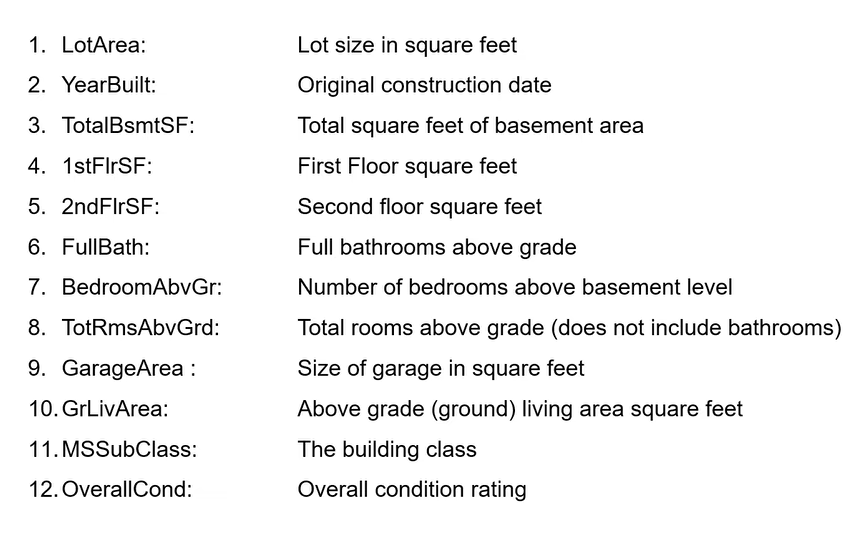

#### Download data from web

In [2]:
import wget
url = "http://ovne.org/download/housing_price.csv"
response = wget.download(url, "housing_price.csv")

100% [..............................................................................] 73526 / 73526

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("housing_price.csv")
df.head()

,LotArea,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,GarageArea,GrLivArea,MSSubClass,OverallCond,SalePrice
0,8450,2003,856,856,854,2,3,8,548,1710,60,5,208500
1,9600,1976,1262,1262,0,2,3,6,460,1262,20,8,181500
2,11250,2001,920,920,866,2,3,6,608,1786,60,5,223500
3,9550,1915,756,961,756,1,3,7,642,1717,70,5,140000
4,14260,2000,1145,1145,1053,2,4,9,836,2198,60,5,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotArea       1460 non-null   int64
 1   YearBuilt     1460 non-null   int64
 2   TotalBsmtSF   1460 non-null   int64
 3   1stFlrSF      1460 non-null   int64
 4   2ndFlrSF      1460 non-null   int64
 5   FullBath      1460 non-null   int64
 6   BedroomAbvGr  1460 non-null   int64
 7   TotRmsAbvGrd  1460 non-null   int64
 8   GarageArea    1460 non-null   int64
 9   GrLivArea     1460 non-null   int64
 10  MSSubClass    1460 non-null   int64
 11  OverallCond   1460 non-null   int64
 12  SalePrice     1460 non-null   int64
dtypes: int64(13)
memory usage: 148.4 KB


In [6]:
# Create the feature input X and target variable Y
X = df.iloc[:,:12]
Y = df.iloc[:,12]

In [8]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)

In [9]:
# import the decision tree regression
from sklearn import tree
# create a regressor object

reg = tree.DecisionTreeRegressor(max_depth = 3, random_state = 42)

#fit the regressor with X_train, Y_train

reg.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [10]:
#Test trained model with test set

yhat = reg.predict(x_test)

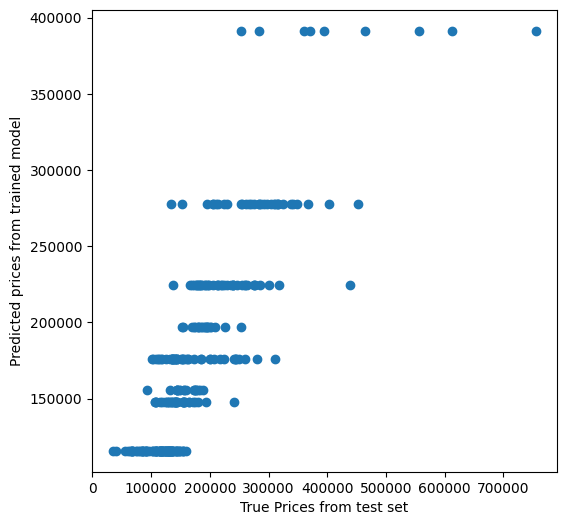

In [12]:
#scatter plot for original data
plt.figure(figsize = (6,6))
plt.scatter(y_test, yhat)
plt.xlabel("True Prices from test set")
plt.ylabel("Predicted prices from trained model")
plt.show()

In [13]:
from sklearn.metrics import mean_absolute_error as MAE
err = MAE(y_test, yhat)

print("Mean absolute error of test set is : ", err)

Mean absolute error of test set is :  33615.65025524834


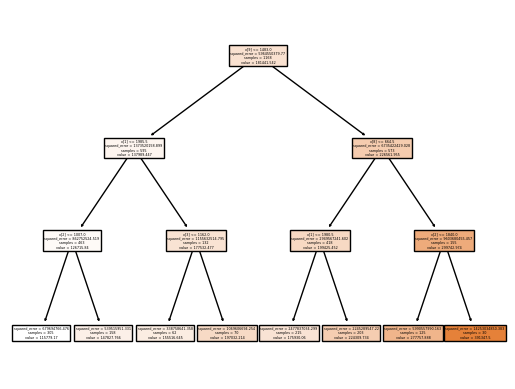

In [16]:
#from sklearn import tree

tree.plot_tree(reg, filled = True);
plt.savefig("out.pdf");

In [18]:
feat_importance = pd.DataFrame(reg.feature_importances_, index = X.columns, columns = ["Importance"])
feat_importance

,Importance
LotArea,0.000000
YearBuilt,0.115479
TotalBsmtSF,0.094956
1stFlrSF,0.012840
2ndFlrSF,0.000000
FullBath,0.000000
BedroomAbvGr,0.000000
TotRmsAbvGrd,0.000000
GarageArea,0.257840
GrLivArea,0.518884


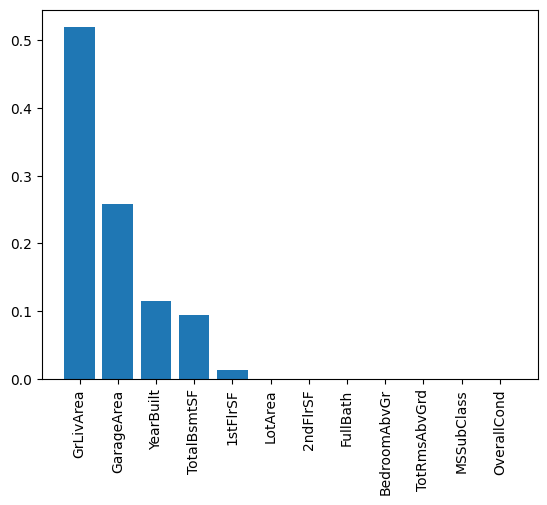

In [31]:
feat_importance.sort_values(by = 'Importance', ascending = False, inplace = True)
plt.bar(feat_importance.index, feat_importance['Importance'])
plt.xticks(rotation = 90);

In [33]:
# Choose optimize max_depth(degree)

train_err = []
test_err = []

for depth in range(1,11):
    
    reg = tree.DecisionTreeRegressor(max_depth= depth, random_state=42)
    reg.fit(X_train,Y_train)
    #compute prices Y_hat from training set
    Yhat = reg.predict(X_train)
    #compute prices y_hat from test set
    yhat = reg.predict(x_test)
    
    train_err.append(MAE(Yhat, Y_train))
    test_err.append(MAE(yhat, y_test))    
    
print(train_err)
print(test_err)

    

[44085.045117938156, 36372.279446768356, 30920.21898539955, 27226.71234815447, 22755.66459429922, 19237.474637876392, 15668.591440074653, 12522.870572073938, 9602.061168928449, 6873.306635506983]
[47466.88180624757, 37667.26372984742, 33615.65025524834, 28791.384944190464, 26873.42949184826, 26223.37258100481, 23782.205336834944, 24149.746949946508, 24601.053596533806, 23303.317012131207]


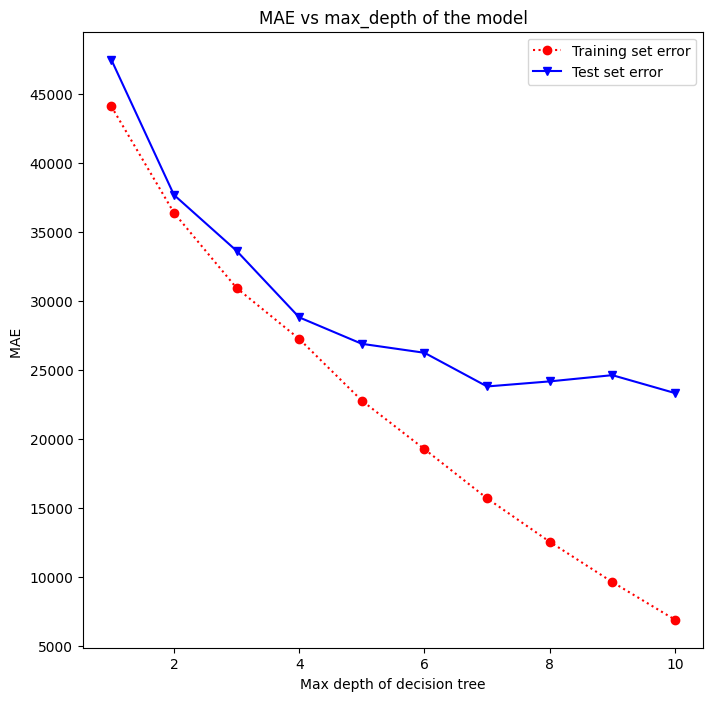

In [42]:

x = np.linspace(1,10,10)

fig, ax = plt.subplots(figsize = (8,8));

ax.plot(x, train_err, "o:r", label = "Training set error");
ax.plot(x, test_err, "v-b", label = "Test set error");
ax.set_title("MAE vs max_depth of the model");
ax.set_xlabel("Max depth of decision tree");
ax.set_ylabel("MAE ");

ax.legend();

### Classification decision trees

In [47]:
import wget
url = "http://ovne.org/download/iris_dataset.csv"
response = wget.download(url, "iris_dataset.csv")

100% [................................................................................] 4620 / 4620

In [48]:
df_iris = pd.read_csv("iris_dataset.csv")
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class_name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotArea       1460 non-null   int64
 1   YearBuilt     1460 non-null   int64
 2   TotalBsmtSF   1460 non-null   int64
 3   1stFlrSF      1460 non-null   int64
 4   2ndFlrSF      1460 non-null   int64
 5   FullBath      1460 non-null   int64
 6   BedroomAbvGr  1460 non-null   int64
 7   TotRmsAbvGrd  1460 non-null   int64
 8   GarageArea    1460 non-null   int64
 9   GrLivArea     1460 non-null   int64
 10  MSSubClass    1460 non-null   int64
 11  OverallCond   1460 non-null   int64
 12  SalePrice     1460 non-null   int64
dtypes: int64(13)
memory usage: 148.4 KB


In [50]:
# Create feature X and target Y
X = df_iris.iloc[:,:-1]
Y = df_iris.iloc[:,-1]

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class_name, Length: 150, dtype: object

In [53]:
# Split to training set and test set

X_train, x_test , Y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)


In [54]:
print(X_train.shape)
print(x_test.shape)
print(Y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [55]:
# Decision Tree Classification
clf = tree.DecisionTreeClassifier(max_depth=3, random_state=42)

# Fit the model

clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [56]:
yhat = clf.predict(x_test)

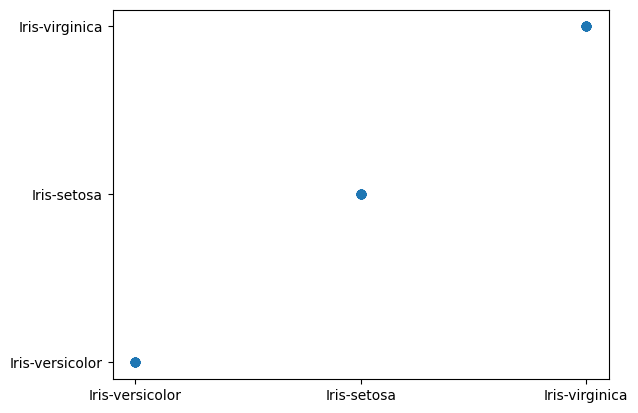

In [57]:
# Show predict
plt.scatter(yhat,y_test)

In [62]:
# Use accuracy score to assess the model

from sklearn.metrics import accuracy_score as ac

err = ac(yhat,y_test)
print(f"Accuracy score of the model {err}")

Accuracy score of the model 1.0


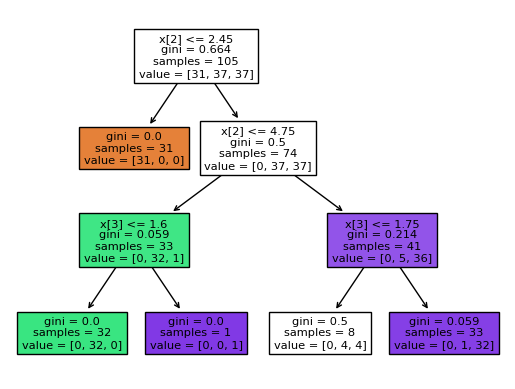

In [66]:
tree.plot_tree(clf, filled= True);
plt.savefig("out2.pdf");

In [70]:
# Show feature importance

feat_importance_clf = pd.DataFrame(clf.feature_importances_, index=X.columns, columns=['Importance'])
feat_importance_clf

,Importance
sepal_length,0.000000
sepal_width,0.000000
petal_length,0.925108
petal_width,0.074892


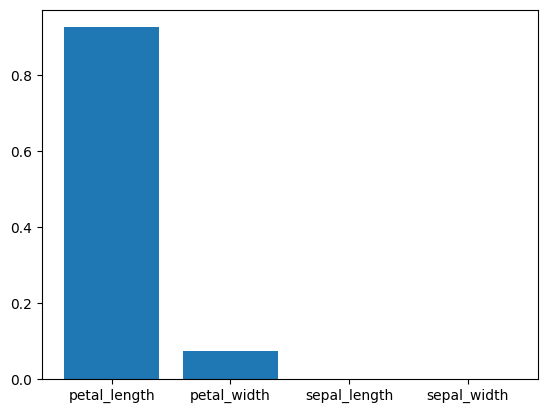

In [73]:
feat_importance_clf.sort_values(by = 'Importance', ascending = False, inplace = True)
plt.bar(feat_importance_clf.index, feat_importance_clf['Importance']);

In [75]:
# Chooose optimize max_depth

train_err = []

test_err = []

for depth in range(1,11):
    
    # Fit model
    
    clf = tree.DecisionTreeClassifier(max_depth= depth, random_state=42)
    
    clf.fit(X_train,Y_train)
    # Compute Yhat from training set
    
    Yhat = clf.predict(X_train)
    # Compute Yhat from training set
    
    yhat = clf.predict(x_test)
    
    train_err.append(ac(Yhat,Y_train))
    test_err.append(ac(yhat,y_test))
    
print(train_err)
print(test_err)                    

[0.6476190476190476, 0.9428571428571428, 0.9523809523809523, 0.9714285714285714, 0.9904761904761905, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.7111111111111111, 0.9777777777777777, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


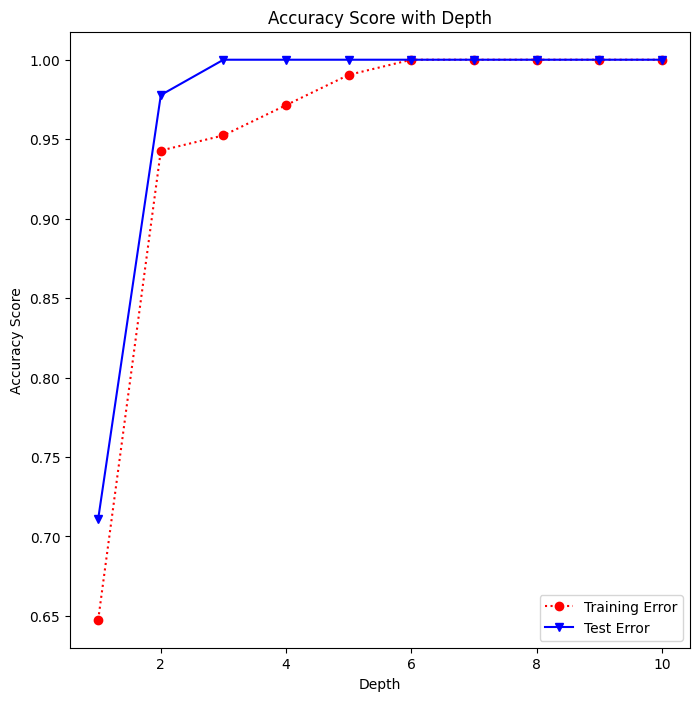

In [77]:
# show AC with max_depth
x = np.linspace(1,10,10)

fig, ax = plt.subplots(figsize = (8,8))

ax.plot(x, train_err,"o:r", label = "Training Error");
ax.plot(x, test_err,"v-b", label = "Test Error");
ax.set_title("Accuracy Score with Depth");
ax.set_xlabel("Depth");
ax.set_ylabel("Accuracy Score");
ax.legend();
plt.show();